In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans, kmeans_predict

In [18]:
np.random.seed(42)

In [19]:
data_size, dims, num_clusters = 1000, 2, 3
x = np.random.randn(data_size, dims) / 6
x = torch.from_numpy(x)
x

tensor([[ 0.0828, -0.0230],
        [ 0.1079,  0.2538],
        [-0.0390, -0.0390],
        ...,
        [ 0.0586,  0.1784],
        [-0.0044, -0.1470],
        [-0.0272, -0.1242]], dtype=torch.float64)

In [20]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
device

device(type='cpu')

In [21]:
cluster_ids_x, cluster_centers = kmeans(X=x, num_clusters=num_clusters, distance="euclidean", device=device)

#cluster_ids - generuje macierz ktora determinuje w jakiej grupie znalazla sie dana liczba z macierzy x
#centers - wspolrzedne srodka grupy

cluster_centers

running k-means on cpu..


[running kmeans]: 5it [00:00, 263.17it/s, center_shift=0.000047, iteration=5, tol=0.000100]


tensor([[ 0.0730,  0.1721],
        [ 0.1025, -0.1316],
        [-0.1560, -0.0139]])

In [22]:
y = np.random.randn(5,dims) / 6
y = torch.from_numpy(y) 


tensor([[ 0.2497, -0.0839],
        [ 0.0635,  0.1318],
        [ 0.2483, -0.0863],
        [-0.1030, -0.1770],
        [ 0.3727,  0.2307]], dtype=torch.float64)

In [23]:
cluster_ids_y = kmeans_predict(X=y, cluster_centers=cluster_centers, distance='euclidean', device=device)
cluster_ids_y

predicting on cpu..


tensor([1, 0, 1, 2, 0])

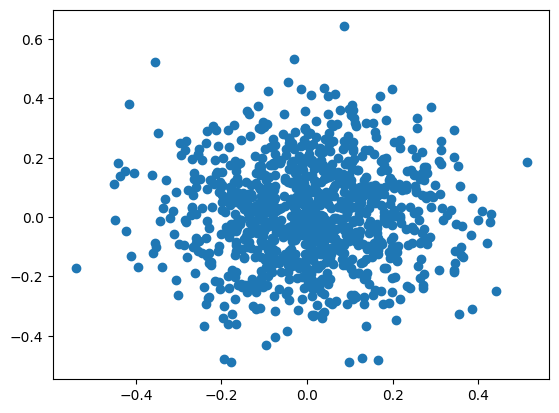

In [28]:
plt.scatter(x[:,0], x[:,1])

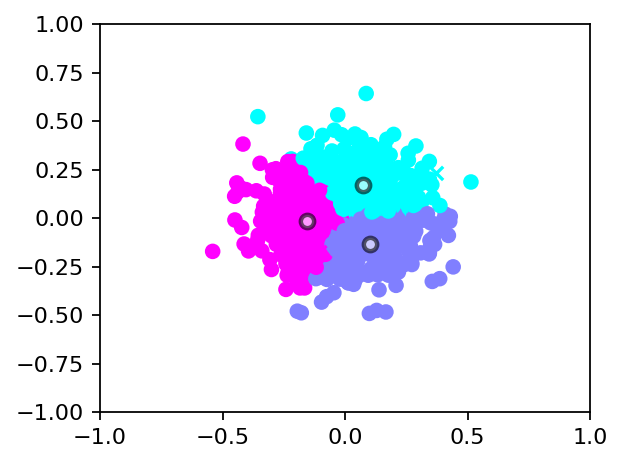

In [30]:
plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool', marker='x')
plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)
plt.axis([-1, 1, -1, 1])
plt.tight_layout()
plt.show()
